In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
df.shape

(850, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [6]:
df.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


<Axes: xlabel='survived', ylabel='count'>

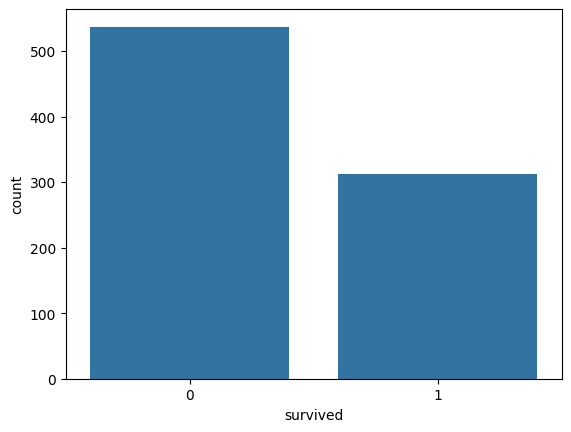

In [8]:
#Count plot of survived vs Not survived
sns.countplot(x='survived',data=df)

<Axes: xlabel='survived', ylabel='count'>

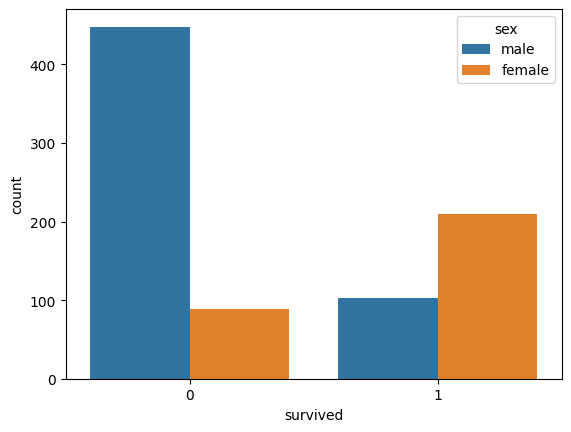

In [9]:
#Male vs Female survived
sns.countplot(x='survived',hue='sex',data=df)

In [11]:
#check how many null values
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [12]:
#fill the age column with average of all age
df['age'].fillna(df['age'].mean(),inplace=True)

In [13]:
#verify null values
df['age'].isnull().sum()

0

<Axes: >

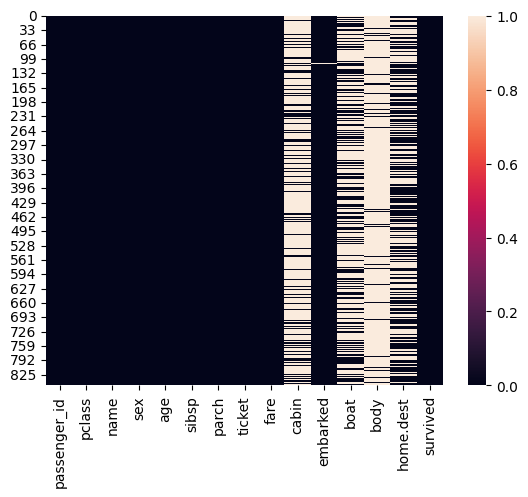

In [14]:
sns.heatmap(df.isnull())

In [17]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [55]:
df['fare'].fillna(df['fare'].mean(),inplace=True)

We can see cabin, boat, body ,home.dest columns has more number of null values hence we cannot use it for prediction.
So, we can drop these columns.

In [15]:
df.drop(['cabin','boat','body','home.dest'],axis=1,inplace=True)

In [18]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,29.519847,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.000000,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.000000,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.000000,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.000000,0,0,28221,13.0000,S,0


<Axes: >

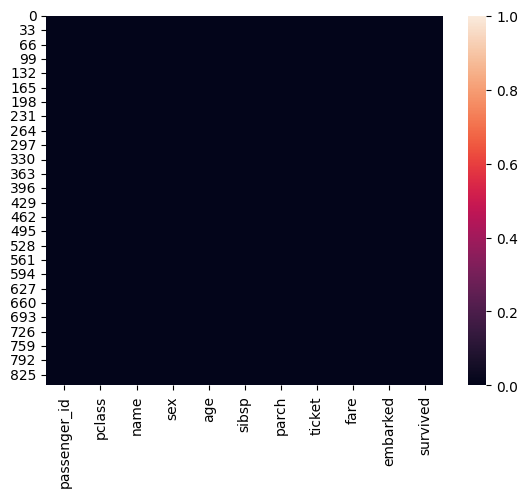

In [19]:
sns.heatmap(df.isnull())#verify nullvalues are present or not.

In [23]:
#converting sex column to numeric columns
df['sex']=pd.get_dummies(df['sex'],drop_first=True).astype(int)

In [24]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",0,29.519847,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",1,38.000000,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",0,30.000000,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",0,54.000000,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",1,40.000000,0,0,28221,13.0000,S,0


In [25]:
#columns which are categorical and numerical
cat_colmn=['name','ticket','embarked']
num_colms=['passenger_id','pclass','sex','age','sibsp','parch','fare','survived']

In [40]:
df.drop(cat_colmn,axis=1,inplace=True)

In [45]:
df.head()

,passenger_id,pclass,sex,age,sibsp,parch,fare,survived
0,1216,3,0,29.519847,0,0,7.7333,1
1,699,3,1,38.000000,0,0,8.6625,0
2,1267,3,0,30.000000,1,1,24.1500,0
3,449,2,0,54.000000,1,3,23.0000,1
4,576,2,1,40.000000,0,0,13.0000,0


In [56]:
#Seperate dependent and independent variables
x=df[['passenger_id','pclass','sex','age','sibsp','parch','fare']]
y=df['survived']

In [57]:
df.isnull().sum()

passenger_id    0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
survived        0
dtype: int64

**Data Modelling**

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
LR=LogisticRegression()

In [60]:
LR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
predict=LR.predict(x_test)
predict

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [63]:
#define the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.7705882352941177

In [64]:
#r2 value
from sklearn.metrics import r2_score
r2_score(y_test,predict)

0.044117647058823484